# Project: The Retinal OCT Project

## Table of Contents

- <a href='#dataset'>1. Data Set Description</a> 
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingRetinal'>2.3.  Dataset Of Retinal OCT</a>
- <a href='#info'>4.1. Show Information Of DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#scrath'>5.2.1. Model from Scratch </a>
             - <a href='#scrathf'>5.2.1.1. Model from Simple Scratch</a>
             - <a href='#scratchComplex'>5.2.1.2. Model from Scratch More Complex</a>
        - <a href='#VGG16'>5.2.2. Model VGG16</a>
            - <a href='#trainVGG16'>5.2.2.1. Model VGG16 ( trainable  )</a>
            - <a href='#freezeVGG16'>5.2.2.2. Model VGG16 ( false trainalbe ) </a>
        - <a href='#ResNet152V2'>5.2.3. Model ResNet152V2</a>
            - <a href='#trainResNet152V2'>5.2.3.1. Model ResNet152V2 ( trainable  )</a>
            - <a href='#freezeResNet152V2'>5.2.3.2. Model ResNet152V2 ( false trainalbe )</a>
        - <a href='#Xception'>5.2.4. Model Xception</a>
            - <a href='#aXception'>5.2.4.1. Model Xception  ( trainable  )</a>
            - <a href='#bXception'>5.2.4.2. Model Xception ( false trainalbe )</a>
        - <a href='#MobileNet'>5.2.5. Model MobileNet</a>
            - <a href='#trainMobileNet'>5.2.5.1. Model MobileNet  ( trainable  )</a>
            - <a href='#freezeMobileNet'>5.2.5.2. Model MobileNet ( false trainalbe )</a>
        - <a href='#InceptionV3'>5.2.6. Model InceptionV3</a>
            - <a href='#trainInceptionV3'>5.2.6.1. Model InceptionV3</a>
            - <a href='#freezeInceptionV3'>5.2.6.2. Model InceptionV3 ( false trainalbe )</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='dataset'></a>
## Data Set Description

The image data that was used for this problem is [ kermany2018 ] (https://www.kaggle.com/datasets/paultimothymooney/kermany2018). 

# Importing libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn 
import random
import cv2
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingRetinal'></a>
## Dataset Of Retinal OCT

In [27]:
list_paths = []
list_class_categories = []

for dirname, _, filenames in os.walk('../input/kermany2018/OCT2017 /train'):
    for filename in filenames:
        list_paths.append(os.path.join(dirname, filename))
        class_disease = dirname.split("/")[-1]
        list_class_categories.append(class_disease)

In [28]:
df_Retinal_OCT = pd.DataFrame({'filename': list_paths,'category' : list_class_categories })

In [29]:
df_Retinal_OCT[:5]

,filename,category
0,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
1,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
2,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
3,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
4,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN


In [30]:
df_Retinal_OCT['category'].value_counts()

CNV       37205
NORMAL    26315
DME       11348
DRUSEN     8616
Name: category, dtype: int64

## Save DataSet

In [31]:
df_Retinal_OCT.to_csv('DataSet_Retinal_OCT.csv')

<a id='info'></a>
## Show Information Of DataSet

#### Gathering Data

In [32]:
df = pd.read_csv('DataSet_Retinal_OCT.csv')
df[:10]

,Unnamed: 0,filename,category
0,0,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
1,1,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
2,2,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
3,3,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
4,4,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
5,5,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
6,6,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
7,7,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
8,8,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN
9,9,../input/kermany2018/OCT2017 /train/DRUSEN/DRU...,DRUSEN


#### View information of data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83484 entries, 0 to 83483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  83484 non-null  int64 
 1   filename    83484 non-null  object
 2   category    83484 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


#### View missing data

In [34]:
df.isnull().sum()

Unnamed: 0    0
filename      0
category      0
dtype: int64

#### View duplicated data

In [35]:
sum(df.duplicated())

0

#### View unique data

In [36]:
df['category'].unique()

array(['DRUSEN', 'CNV', 'NORMAL', 'DME'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which Category has a number of recurrences more?

we will create a list of the type to find the recurrences for each category

In [37]:
list_type = df['category'].unique()  #list of category
dict_type = {}
for category in list_type:
    count = len(df[df['category'] == category])
    dict_type[category]= count

In [38]:
dict_type

{'DRUSEN': 8616, 'CNV': 37205, 'NORMAL': 26315, 'DME': 11348}

In [39]:
# to extract category by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('CNV', 37205)

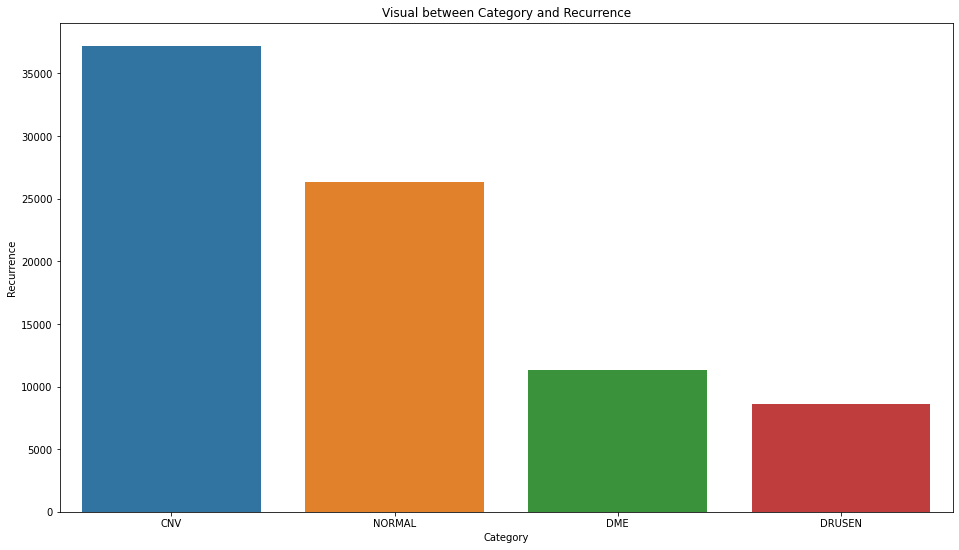

In [40]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Category and Recurrence')
plt.xlabel('Category')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

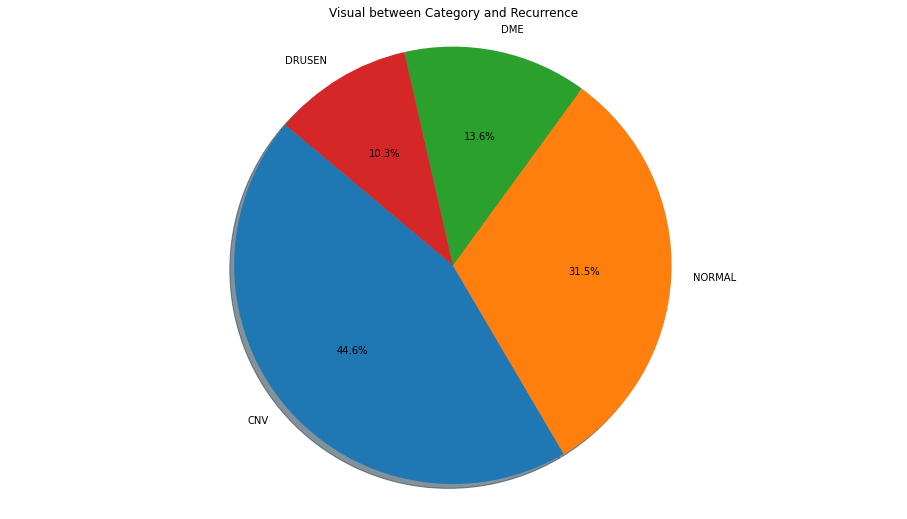

In [41]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Category and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [42]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is CNV which amounts to his recurrence 37205 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


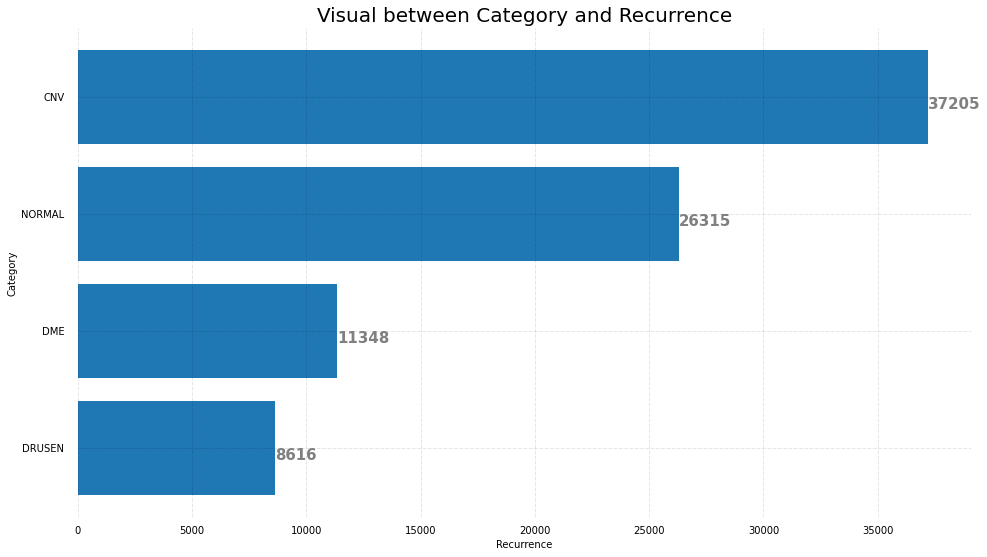

In [43]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Category')
ax.set_title('Visual between Category and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [44]:
df_Drusen = df[df['category'] == 'DRUSEN']
df_Cnv = df[df['category'] == 'CNV']
df_Normal = df[df['category'] == 'NORMAL']
df_Dme = df[df['category'] == 'DME']

## We will split each of dataframe to three dataframe ( Train , Validate , Test)
#### Train 80%
#### Valid 20%

### We will split data of Drusen 

In [45]:
# data of Drusen
df_Drusen_old = df_Drusen
validate_df_Drusen = df_Drusen.sample(frac = 0.2)
train_df_Drusen = df_Drusen.drop(validate_df_Drusen.index)
validate_df_Drusen = validate_df_Drusen.reset_index()
train_df_Drusen = train_df_Drusen.reset_index()

In [46]:
len(df_Drusen_old) , len(train_df_Drusen) , len(validate_df_Drusen)

(8616, 6893, 1723)

### We will split data of Cnv 

In [47]:
# data of Cnv
df_Cnv_old = df_Cnv
validate_df_Cnv = df_Cnv.sample(frac = 0.05)
train_df_Cnv = df_Cnv.drop(validate_df_Cnv.index)
validate_df_Cnv = validate_df_Cnv.reset_index()
train_df_Cnv = train_df_Cnv.reset_index()

test_df_Cnv = train_df_Cnv.sample(frac = 0.7)
train_df_Cnv = train_df_Cnv.drop(test_df_Cnv.index)
test_df_Cnv = test_df_Cnv.reset_index()
train_df_Cnv = train_df_Cnv.reset_index()

In [48]:
len(df_Cnv_old) , len(train_df_Cnv) , len(validate_df_Cnv) ,len(test_df_Cnv)

(37205, 10603, 1860, 24742)

### We will split data of Normal

In [49]:
# data of Normal
df_Normal_old = df_Normal
validate_df_Normal= df_Normal.sample(frac = 0.07)
train_df_Normal = df_Normal.drop(validate_df_Normal.index)
validate_df_Normal = validate_df_Normal.reset_index()
train_df_Normal = train_df_Normal.reset_index()

test_df_Normal = train_df_Normal.sample(frac = 0.6)
train_df_Normal = train_df_Normal.drop(test_df_Normal.index)
test_df_Normal = test_df_Normal.reset_index()
train_df_Normal = train_df_Normal.reset_index()

In [50]:
len(df_Normal_old) , len(train_df_Normal) , len(validate_df_Normal) ,len(test_df_Normal)

(26315, 9789, 1842, 14684)

### We will split data of Dme

In [51]:
# data of Dme
df_Dme_old = df_Dme
validate_df_Dme = df_Dme.sample(frac = 0.2)
train_df_Dme = df_Dme.drop(validate_df_Dme.index)
validate_df_Dme = validate_df_Dme.reset_index()
train_df_Dme = train_df_Dme.reset_index()

In [52]:
len(df_Dme_old) , len(train_df_Dme) , len(validate_df_Dme) 

(11348, 9078, 2270)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [53]:
!mkdir TRAIN  TRAIN/DRUSEN TRAIN/CNV TRAIN/NORMAL TRAIN/DME 
!mkdir VAL  VAL/DRUSEN VAL/CNV VAL/NORMAL VAL/DME 
!mkdir TEST  TEST/DRUSEN TEST/CNV TEST/NORMAL TEST/DME 

mkdir: cannot create directory ‘TRAIN’: File exists
mkdir: cannot create directory ‘TRAIN/DRUSEN’: File exists
mkdir: cannot create directory ‘TRAIN/CNV’: File exists
mkdir: cannot create directory ‘TRAIN/NORMAL’: File exists
mkdir: cannot create directory ‘TRAIN/DME’: File exists
mkdir: cannot create directory ‘VAL’: File exists
mkdir: cannot create directory ‘VAL/DRUSEN’: File exists
mkdir: cannot create directory ‘VAL/CNV’: File exists
mkdir: cannot create directory ‘VAL/NORMAL’: File exists
mkdir: cannot create directory ‘VAL/DME’: File exists
mkdir: cannot create directory ‘TEST’: File exists
mkdir: cannot create directory ‘TEST/DRUSEN’: File exists
mkdir: cannot create directory ‘TEST/CNV’: File exists
mkdir: cannot create directory ‘TEST/NORMAL’: File exists
mkdir: cannot create directory ‘TEST/DME’: File exists


In [54]:
IMG_SIZE = (300,300)
def process_save_img(size,full_path_img,name_image,new_folder):
    img = cv2.imread(full_path_img)
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(new_folder+'/'+name_image, img)

In [55]:
#DataSet DME
for filename in tqdm(train_df_Dme['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/DME')
print('finish TRAIN/DME')
for filename in tqdm(validate_df_Dme['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/DME')
print('finish VAL/DME')

#DataSet NORMAL
for filename in tqdm(train_df_Normal['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/NORMAL')
print('finish TRAIN/NORMAL')
for filename in tqdm(validate_df_Normal['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/NORMAL')
print('finish VAL/NORMAL')


#DataSet CNV
for filename in tqdm(train_df_Cnv['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/CNV')
print('finish TRAIN/CNV')
for filename in tqdm(validate_df_Cnv['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/CNV')
print('finish VAL/CNV')


#DataSet DRUSEN
for filename in tqdm(train_df_Drusen['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/DRUSEN')
print('finish TRAIN/DRUSEN')
for filename in tqdm(validate_df_Drusen['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/DRUSEN')
print('finish VAL/DRUSEN')

100%|██████████| 9078/9078 [01:50<00:00, 81.84it/s]


finish TRAIN/DME


100%|██████████| 2270/2270 [00:27<00:00, 82.01it/s]


finish VAL/DME


100%|██████████| 9789/9789 [02:10<00:00, 74.81it/s]


finish TRAIN/NORMAL


100%|██████████| 1842/1842 [00:25<00:00, 73.65it/s]


finish VAL/NORMAL


100%|██████████| 10603/10603 [02:29<00:00, 71.08it/s]


finish TRAIN/CNV


100%|██████████| 1860/1860 [00:26<00:00, 70.21it/s]


finish VAL/CNV


100%|██████████| 6893/6893 [01:22<00:00, 83.05it/s]


finish TRAIN/DRUSEN


100%|██████████| 1723/1723 [00:20<00:00, 83.59it/s]

finish VAL/DRUSEN


In [56]:
print('Length Of Data { DME } Train : ',len(os.listdir('TRAIN/DME')))
print('Length Of Data { DME } VAL : ',len(os.listdir('VAL/DME')))

print('Length Of Data { NORMAL } Train : ',len(os.listdir('TRAIN/NORMAL')))
print('Length Of Data { NORMAL } VAL : ',len(os.listdir('VAL/NORMAL')))

print('Length Of Data { CNV } Train : ',len(os.listdir('TRAIN/CNV')))
print('Length Of Data { CNV } VAL : ',len(os.listdir('VAL/CNV')))

print('Length Of Data { DRUSEN } Train : ',len(os.listdir('TRAIN/DRUSEN')))
print('Length Of Data { DRUSEN } VAL : ',len(os.listdir('VAL/DRUSEN')))

Length Of Data { DME } Train :  9078
Length Of Data { DME } VAL :  2270
Length Of Data { NORMAL } Train :  9789
Length Of Data { NORMAL } VAL :  1842
Length Of Data { CNV } Train :  10603
Length Of Data { CNV } VAL :  1860
Length Of Data { DRUSEN } Train :  6893
Length Of Data { DRUSEN } VAL :  1723


In [57]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

In [58]:
train_path = './TRAIN'
test_path = '../input/kermany2018/OCT2017 /test'
valid_path = './VAL'

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [59]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_gen = ImageDataGenerator(rescale = 1./255)




In [60]:
IMG_SIZE = (224,224)
batch_size = 64

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 36363 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 7695 images belonging to 4 classes.


In [62]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = '../input/kermany2018/OCT2017 /test'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 36363 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 7695 images belonging to 4 classes.


<a id='demo'></a>
## Demo

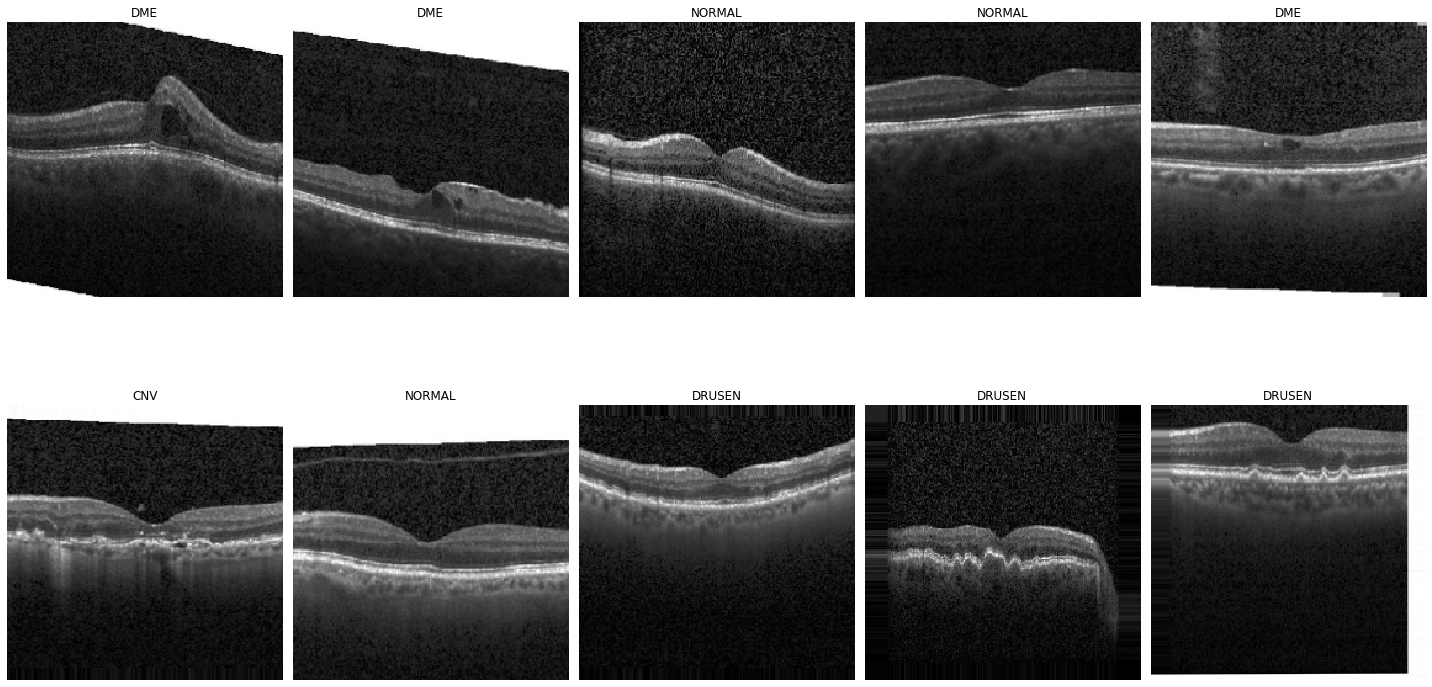

In [63]:
idx2label_dict = {trainRgb.class_indices[k]: k for k in trainRgb.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in trainRgb:
        image = X_batch[0]        
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [64]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [65]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',classes = np.unique(trainRgb.classes),y = trainRgb.classes)
cw = dict(zip( np.unique(trainRgb.classes), weights))
print(cw)

{0: 0.8573752711496746, 1: 1.0014044943820224, 2: 1.3188379515450457, 3: 0.9286699356420473}


<a id='build'></a>
## Model Building

<a id='scrath'></a>
## Model from Scratch

<a id='scrathf'></a>
## Model from Simple Scratch

In [66]:
input_shape = (224,224,3)
scratchSimple = Sequential()
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Flatten())
scratchSimple.add(Dense(activation = 'relu', units = 128))
scratchSimple.add(Dense(activation = 'relu', units = 64))
scratchSimple.add(Dense(activation = 'softmax', units = 4))
scratchSimple.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchSimple.summary()

2022-06-05 16:17:07.342803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 16:17:07.470109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 16:17:07.470820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 16:17:07.472166: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

In [67]:
epochs = 10

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-05 16:17:10.833788: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-05 16:17:13.172632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


568/568 [==============================] - 467s 808ms/step - loss: 0.8848 - accuracy: 0.6429 - val_loss: 0.7030 - val_accuracy: 0.7284
Epoch 2/10
568/568 [==============================] - 458s 807ms/step - loss: 0.6104 - accuracy: 0.7731 - val_loss: 0.5231 - val_accuracy: 0.8051
Epoch 3/10
568/568 [==============================] - 459s 808ms/step - loss: 0.4571 - accuracy: 0.8331 - val_loss: 0.3743 - val_accuracy: 0.8677
Epoch 4/10
568/568 [==============================] - 459s 807ms/step - loss: 0.3617 - accuracy: 0.8723 - val_loss: 0.3189 - val_accuracy: 0.8896
Epoch 5/10
568/568 [==============================] - 459s 807ms/step - loss: 0.3191 - accuracy: 0.8882 - val_loss: 0.2990 - val_accuracy: 0.8947
Epoch 6/10
568/568 [==============================] - 460s 810ms/step - loss: 0.2866 - accuracy: 0.9015 - val_loss: 0.2945 - val_accuracy: 0.9003
Epoch 7/10
568/568 [==============================] - 457s 806ms/step - loss: 0.2686 - accuracy: 0.9074 - val_loss: 0.2650 - val_accura

In [68]:
scratchSimple.save('./scratchSimpleP.h5')

<a id='scratchComplex'></a>
## Model from Scrath More Complex

In [69]:
input_shape = (224,224,3)
scratchComplex = Sequential()
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Flatten())
scratchComplex.add(Dense(activation = 'relu', units = 128))
scratchComplex.add(Dense(activation = 'relu', units = 64))
scratchComplex.add(Dense(activation = 'softmax', units = 4))
scratchComplex.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchComplex.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 64)       

In [70]:
epochs = 10

historyComplex = scratchComplex.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchComplex.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
568/568 [==============================] - 478s 838ms/step - loss: 0.7235 - accuracy: 0.7227 - val_loss: 0.9451 - val_accuracy: 0.6339
Epoch 2/10
568/568 [==============================] - 479s 844ms/step - loss: 0.3337 - accuracy: 0.8864 - val_loss: 0.5315 - val_accuracy: 0.8128
Epoch 3/10
568/568 [==============================] - 476s 838ms/step - loss: 0.2742 - accuracy: 0.9088 - val_loss: 0.3375 - val_accuracy: 0.8828
Epoch 4/10
568/568 [==============================] - 476s 838ms/step - loss: 0.2411 - accuracy: 0.9182 - val_loss: 0.5493 - val_accuracy: 0.8270
Epoch 5/10
568/568 [==============================] - 476s 837ms/step - loss: 0.2260 - accuracy: 0.9256 - val_loss: 0.3790 - val_accuracy: 0.8669

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/10
568/568 [==============================] - 476s 838ms/step - loss: 0.1763 - accuracy: 0.9412 - val_loss: 0.1966 - val_accuracy: 0.9329
Epoch 7/10
568/568 [=======================

In [71]:
scratchComplex.save('./scratchComplexP.h5')

 <a id='VGG16'></a>
## Model VGG16

 <a id='trainVGG16'></a>
## Model VGG16 ( trainable  )

In [72]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16= Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(128,activation='relu'))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Dense(4, activation='softmax'))
model_VGG16.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_______________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
epochs = 10

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
568/568 [==============================] - 550s 956ms/step - loss: 0.3772 - accuracy: 0.8686 - val_loss: 0.1954 - val_accuracy: 0.9354
Epoch 2/10
568/568 [==============================] - 544s 957ms/step - loss: 0.2180 - accuracy: 0.9313 - val_loss: 0.1810 - val_accuracy: 0.9350
Epoch 3/10
568/568 [==============================] - 545s 959ms/step - loss: 0.1841 - accuracy: 0.9414 - val_loss: 0.1556 - val_accuracy: 0.9490
Epoch 4/10
568/568 [==============================] - 544s 957ms/step - loss: 0.1649 - accuracy: 0.9461 - val_loss: 0.1348 - val_accuracy: 0.9536
Epoch 5/10
568/568 [==============================] - 544s 957ms/step - loss: 0.1475 - accuracy: 0.9523 - val_loss: 0.1788 - val_accuracy: 0.9439
Epoch 6/10
568/568 [==============================] - 543s 956ms/step - loss: 0.1419 - accuracy: 0.9529 - val_loss: 0.1627 - val_accuracy: 0.9466

Epoch 00006: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 7/10
568/568 [======================

In [74]:
model_VGG16.save('./model_VGG16P.h5')

 <a id='freezeVGG16'></a>
## Model VGG16 ( false trainable )

In [80]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in VGG16.layers:
    layer.trainable = False
model_VGG16F= Sequential()
model_VGG16F.add(VGG16)
model_VGG16F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16F.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Flatten())
model_VGG16F.add(Dense(128,activation='relu'))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Dense(4,activation='softmax'))
model_VGG16F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16F.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [81]:
epochs = 10

historyVGG16F = model_VGG16F.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16F.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
568/568 [==============================] - 481s 846ms/step - loss: 0.7550 - accuracy: 0.7096 - val_loss: 0.5426 - val_accuracy: 0.7915
Epoch 2/10
568/568 [==============================] - 479s 843ms/step - loss: 0.5034 - accuracy: 0.8191 - val_loss: 0.4648 - val_accuracy: 0.8237
Epoch 3/10
568/568 [==============================] - 481s 846ms/step - loss: 0.4555 - accuracy: 0.8381 - val_loss: 0.4439 - val_accuracy: 0.8329
Epoch 4/10
568/568 [==============================] - 485s 854ms/step - loss: 0.4242 - accuracy: 0.8493 - val_loss: 0.4400 - val_accuracy: 0.8335
Epoch 5/10
568/568 [==============================] - 479s 844ms/step - loss: 0.3977 - accuracy: 0.8587 - val_loss: 0.3681 - val_accuracy: 0.8633
Epoch 6/10
568/568 [==============================] - 480s 846ms/step - loss: 0.3786 - accuracy: 0.8659 - val_loss: 0.3626 - val_accuracy: 0.8663
Epoch 7/10
568/568 [==============================] - 484s 853ms/step - loss: 0.3691 - accuracy: 0.8705 - val_loss: 0.3754 -

In [82]:
model_VGG16F.save('./model_VGG16FP.h5')

<a id='ResNet152V2'></a>
## Model ResNet152V2 

<a id='trainResNet152V2'></a>
## Model ResNet152V2 ( trainable  )

In [83]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
model_Resnet = Sequential()
model_Resnet.add(ResNet152V2)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(512, activation='relu'))
model_Resnet.add(Dense(4, activation='softmax'))
model_Resnet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Resnet.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 2052      
Total params: 109,714,436
Trainable params: 109,570,692
Non-trainable params: 143,744
_________________________________________________________________


In [84]:
epochs = 10
historyResnet = model_Resnet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Resnet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/10
568/568 [==============================] - 657s 1s/step - loss: 0.3717 - accuracy: 0.8834 - val_loss: 0.3384 - val_accuracy: 0.8910
Epoch 2/10
568/568 [==============================] - 642s 1s/step - loss: 0.2001 - accuracy: 0.9360 - val_loss: 0.1783 - val_accuracy: 0.9406
Epoch 3/10
568/568 [==============================] - 642s 1s/step - loss: 0.1651 - accuracy: 0.9461 - val_loss: 0.1899 - val_accuracy: 0.9367
Epoch 4/10
568/568 [==============================] - 645s 1s/step - loss: 0.1458 - accuracy: 0.9507 - val_loss: 0.2222 - val_accuracy: 0.9359

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 5/10
568/568 [==============================] - 640s 1s/step - loss: 0.0953 - accuracy: 0.9679 - val_loss: 0.1373 - val_accuracy: 0.9570
Epoch 6/10
568/568 [==============================] - 643s 1s/step - loss: 0.0738 - accuracy: 0.9751 - val_loss: 0.1354 - val_accuracy: 0.9566
Epoch 7/10
568/568 [==============================] - 644s 1

In [85]:
model_Resnet.save('./model_ResnetP.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2022-06-06 00:32:25.121350: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.
2022-06-06 00:32:26.755806: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.
2022-06-06 00:32:27.477382: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.


<a id='freezeResNet152V2'></a>
## Model ResNet152V2 ( false trainable  )

In [86]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in ResNet152V2.layers:
        layer.trainable=False
model_ResnetF = Sequential()
model_ResnetF.add(ResNet152V2)
model_ResnetF.add(Flatten())
model_ResnetF.add(Dense(512, activation='relu'))
model_ResnetF.add(Dense(4, activation='softmax'))
model_ResnetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_ResnetF.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 2052      
Total params: 109,714,436
Trainable params: 51,382,788
Non-trainable params: 58,331,648
_________________________________________________________________


In [87]:
epochs = 10
historyResnetF = model_ResnetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_ResnetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/10
568/568 [==============================] - 531s 923ms/step - loss: 0.7497 - accuracy: 0.7596 - val_loss: 0.4875 - val_accuracy: 0.8151
Epoch 2/10
568/568 [==============================] - 518s 912ms/step - loss: 0.4628 - accuracy: 0.8303 - val_loss: 0.4423 - val_accuracy: 0.8315
Epoch 3/10
568/568 [==============================] - 519s 913ms/step - loss: 0.4128 - accuracy: 0.8500 - val_loss: 0.4606 - val_accuracy: 0.8271
Epoch 4/10
568/568 [==============================] - 519s 914ms/step - loss: 0.3794 - accuracy: 0.8637 - val_loss: 0.4779 - val_accuracy: 0.8307

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 5/10
568/568 [==============================] - 523s 920ms/step - loss: 0.3185 - accuracy: 0.8855 - val_loss: 0.3923 - val_accuracy: 0.8531
Epoch 6/10
568/568 [==============================] - 522s 919ms/step - loss: 0.2984 - accuracy: 0.8934 - val_loss: 0.3885 - val_accuracy: 0.8569
Epoch 7/10
568/568 [======================

In [88]:
model_ResnetF.save('./model_ResnetFP.h5')

2022-06-06 02:03:22.079564: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.
2022-06-06 02:03:23.351823: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.


<a id='Xception'></a>
## Model Xception 

<a id='aXception'></a>
## Model Xception ( trainable  )           

In [98]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
model_Xception= Sequential()
model_Xception.add(Xception)
model_Xception.add(Conv2D(64, (3, 3), activation = 'relu'))
model_Xception.add(MaxPooling2D(pool_size = (2, 2)))
model_Xception.add(Dropout(0.10))
model_Xception.add(Flatten())
model_Xception.add(Dense(128,activation='relu'))
model_Xception.add(Dropout(0.10))
model_Xception.add(Dense(4, activation='softmax'))
model_Xception.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Xception.summary()

2022-06-06 08:40:05.633874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 08:40:05.785291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 08:40:05.786071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 08:40:05.787300: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [99]:
epochs = 10

historyXception = model_Xception.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-06 08:40:17.760860: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-06 08:40:17.889979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-06 08:40:22.751871: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-06 08:40:23.706138: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-06 08:40:23.769141: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-06-06 08:40:24.576568: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-06 08:40:25.494151: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.


833/833 [==============================] - 954s 1s/step - loss: 0.2914 - accuracy: 0.9028 - val_loss: 0.1568 - val_accuracy: 0.9480
Epoch 2/10
833/833 [==============================] - 936s 1s/step - loss: 0.1600 - accuracy: 0.9485 - val_loss: 0.1417 - val_accuracy: 0.9538
Epoch 3/10
833/833 [==============================] - 926s 1s/step - loss: 0.1281 - accuracy: 0.9572 - val_loss: 0.1114 - val_accuracy: 0.9638
Epoch 4/10
833/833 [==============================] - 924s 1s/step - loss: 0.1094 - accuracy: 0.9641 - val_loss: 0.0928 - val_accuracy: 0.9703
Epoch 5/10
833/833 [==============================] - 923s 1s/step - loss: 0.0952 - accuracy: 0.9686 - val_loss: 0.0992 - val_accuracy: 0.9644
Epoch 6/10
833/833 [==============================] - 928s 1s/step - loss: 0.0805 - accuracy: 0.9735 - val_loss: 0.0843 - val_accuracy: 0.9724
Epoch 7/10
833/833 [==============================] - 926s 1s/step - loss: 0.0716 - accuracy: 0.9758 - val_loss: 0.0740 - val_accuracy: 0.9754
Epoch 8/10

In [100]:
model_Xception.save('./model_XceptionP.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<a id='bXception'></a>
## Model Xception ( false trainable  )    

In [101]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in Xception.layers:
    layer.trainable = False
model_XceptionF = Sequential()
model_XceptionF.add(Xception)
model_XceptionF.add(Conv2D(64, (3, 3), activation = 'relu'))
model_XceptionF.add(MaxPooling2D(pool_size = (2, 2)))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Flatten())
model_XceptionF.add(Dense(128,activation='relu'))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Dense(4, activation='softmax'))
model_XceptionF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_XceptionF.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [102]:
epochs = 10

historyXceptionF = model_XceptionF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_XceptionF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
833/833 [==============================] - 728s 871ms/step - loss: 0.7007 - accuracy: 0.7312 - val_loss: 0.6043 - val_accuracy: 0.7596
Epoch 2/10
833/833 [==============================] - 714s 857ms/step - loss: 0.5658 - accuracy: 0.7900 - val_loss: 0.5221 - val_accuracy: 0.7975
Epoch 3/10
833/833 [==============================] - 721s 865ms/step - loss: 0.5299 - accuracy: 0.8038 - val_loss: 0.4811 - val_accuracy: 0.8172
Epoch 4/10
833/833 [==============================] - 728s 874ms/step - loss: 0.5076 - accuracy: 0.8144 - val_loss: 0.4695 - val_accuracy: 0.8211
Epoch 5/10
833/833 [==============================] - 737s 885ms/step - loss: 0.4906 - accuracy: 0.8215 - val_loss: 0.4440 - val_accuracy: 0.8328
Epoch 6/10
833/833 [==============================] - 733s 879ms/step - loss: 0.4760 - accuracy: 0.8270 - val_loss: 0.4381 - val_accuracy: 0.8321
Epoch 7/10
833/833 [==============================] - 727s 872ms/step - loss: 0.4687 - accuracy: 0.8292 - val_loss: 0.4454 -

In [ ]:
model_XceptionF.save('./model_XceptionFP.h5')

 <a id='MobileNet'></a>
## Model MobileNet  

# <a id='trainMobileNet'></a>
## Model MobileNet (  trainable  )    

In [38]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,weights='imagenet')
model_MobileNet = Sequential()
model_MobileNet.add(MobileNet)
model_MobileNet.add(Flatten())
model_MobileNet.add(Dense(512, activation='relu'))
model_MobileNet.add(Dense(4, activation='softmax'))
model_MobileNet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNet.summary()

2022-06-06 09:42:22.797812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 09:42:22.948406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 09:42:22.949464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 09:42:22.951534: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 28,921,540
Trainable params: 28,899,652
Non-trainable params: 21,888
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [39]:
epochs = 10

historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-06 09:42:28.353197: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-06 09:42:33.071433: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


568/568 [==============================] - 646s 1s/step - loss: 0.5264 - accuracy: 0.8549 - val_loss: 0.3391 - val_accuracy: 0.8878
Epoch 2/10
568/568 [==============================] - 634s 1s/step - loss: 0.2244 - accuracy: 0.9240 - val_loss: 0.1967 - val_accuracy: 0.9275
Epoch 3/10
568/568 [==============================] - 632s 1s/step - loss: 0.1785 - accuracy: 0.9404 - val_loss: 0.2243 - val_accuracy: 0.9266
Epoch 4/10
568/568 [==============================] - 633s 1s/step - loss: 0.1571 - accuracy: 0.9471 - val_loss: 0.1690 - val_accuracy: 0.9432
Epoch 5/10
568/568 [==============================] - 613s 1s/step - loss: 0.1360 - accuracy: 0.9545 - val_loss: 0.1767 - val_accuracy: 0.9400
Epoch 6/10
568/568 [==============================] - 581s 1s/step - loss: 0.1271 - accuracy: 0.9565 - val_loss: 0.1690 - val_accuracy: 0.9471

Epoch 00006: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 7/10
568/568 [==============================] - 579s 1s/step - lo

In [41]:
model_MobileNet.save('./model_MobileNetP.h5')

 <a id='freezeMobileNet'></a>
## Model MobileNet ( false trainable  )    

In [42]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,weights='imagenet')
for layer in MobileNet.layers:
        layer.trainable=False
model_MobileNetF = Sequential()
model_MobileNetF.add(MobileNet)
model_MobileNetF.add(Flatten())
model_MobileNetF.add(Dense(512, activation='relu'))
model_MobileNetF.add(Dense(4, activation='softmax'))
model_MobileNetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNetF.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 28,921,540
Trainable params: 25,692,676
Non-trainable params: 3,228,864
_________________________________________________________________


In [43]:
epochs = 10

historyMobileNetF = model_MobileNetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
568/568 [==============================] - 562s 990ms/step - loss: 0.3733 - accuracy: 0.8671 - val_loss: 0.4052 - val_accuracy: 0.8548
Epoch 3/10
568/568 [==============================] - 545s 960ms/step - loss: 0.2748 - accuracy: 0.9059 - val_loss: 0.3083 - val_accuracy: 0.8889
Epoch 5/10
568/568 [==============================] - 550s 968ms/step - loss: 0.2608 - accuracy: 0.9094 - val_loss: 0.2958 - val_accuracy: 0.8932
Epoch 6/10
568/568 [==============================] - 548s 964ms/step - loss: 0.2458 - accuracy: 0.9152 - val_loss: 0.3032 - val_accuracy: 0.8921
Epoch 7/10
568/568 [==============================] - 543s 955ms/step - loss: 0.2382 - accuracy: 0.9173 - val_loss: 0.3057 - val_accuracy: 0.8924

Epoch 00007: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
Epoch 8/10
568/568 [==============================] - 554s 976ms/step - loss: 0.2183 - accuracy: 0.9254 - val_loss: 0.2967 - val_accuracy: 0.8943
Epoch 9/10
568/568 [=======================

In [44]:
model_MobileNetF.save('./model_MobileNetFP.h5')

In [35]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = '../input/kermany2018/OCT2017 /test'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 36363 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 7695 images belonging to 4 classes.


<a id='InceptionV3'></a>
## Model InceptionV3 

<a id='trainInceptionV3'></a>
## Model InceptionV3 ( trainable )    

In [39]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
model_InceptionV3= Sequential()
model_InceptionV3.add(InceptionV3)
model_InceptionV3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(128,activation='relu'))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Dense(4, activation='softmax'))
model_InceptionV3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3.summary()

2022-06-06 10:19:30.181059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 10:19:30.326831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 10:19:30.327581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 10:19:30.328872: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [40]:
epochs = 10

historyInception = model_InceptionV3.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-06 10:19:45.780207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-06 10:19:53.850236: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


568/568 [==============================] - 862s 1s/step - loss: 0.3487 - accuracy: 0.8797 - val_loss: 0.1985 - val_accuracy: 0.9346
Epoch 2/10
568/568 [==============================] - 831s 1s/step - loss: 0.1756 - accuracy: 0.9439 - val_loss: 0.1997 - val_accuracy: 0.9389
Epoch 3/10
568/568 [==============================] - 839s 1s/step - loss: 0.1440 - accuracy: 0.9530 - val_loss: 0.1520 - val_accuracy: 0.9490
Epoch 4/10
568/568 [==============================] - 860s 2s/step - loss: 0.1195 - accuracy: 0.9605 - val_loss: 0.1574 - val_accuracy: 0.9478
Epoch 5/10
568/568 [==============================] - 852s 2s/step - loss: 0.1059 - accuracy: 0.9647 - val_loss: 0.1405 - val_accuracy: 0.9510
Epoch 6/10
568/568 [==============================] - 865s 2s/step - loss: 0.0992 - accuracy: 0.9675 - val_loss: 0.1782 - val_accuracy: 0.9375
Epoch 7/10
568/568 [==============================] - 853s 2s/step - loss: 0.0875 - accuracy: 0.9710 - val_loss: 0.2274 - val_accuracy: 0.9322

Epoch 000

In [41]:
model_InceptionV3.save('./model_InceptionV3P.h5')

<a id='freezeInceptionV3'></a>
## Model InceptionV3 ( false trainable  )    

In [42]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in InceptionV3.layers:
    layer.trainable = False
model_InceptionV3F= Sequential()
model_InceptionV3F.add(InceptionV3)
model_InceptionV3F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3F.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Flatten())
model_InceptionV3F.add(Dense(128,activation='relu'))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Dense(4, activation='softmax'))
model_InceptionV3F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3F.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               73856     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [43]:
epochs = 10

historyInceptionV3F = model_InceptionV3F.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3F.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/10
568/568 [==============================] - 872s 2s/step - loss: 0.6855 - accuracy: 0.7336 - val_loss: 0.4549 - val_accuracy: 0.8270
Epoch 2/10
568/568 [==============================] - 873s 2s/step - loss: 0.4866 - accuracy: 0.8236 - val_loss: 0.4724 - val_accuracy: 0.8267
Epoch 3/10
568/568 [==============================] - 828s 1s/step - loss: 0.4386 - accuracy: 0.8423 - val_loss: 0.3828 - val_accuracy: 0.8577
Epoch 4/10
568/568 [==============================] - 809s 1s/step - loss: 0.4072 - accuracy: 0.8545 - val_loss: 0.3958 - val_accuracy: 0.8561
Epoch 5/10
568/568 [==============================] - 793s 1s/step - loss: 0.3867 - accuracy: 0.8612 - val_loss: 0.4113 - val_accuracy: 0.8505

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 6/10
568/568 [==============================] - 814s 1s/step - loss: 0.3420 - accuracy: 0.8791 - val_loss: 0.3410 - val_accuracy: 0.8767
Epoch 7/10
568/568 [==============================] - 793s 1

In [45]:
model_InceptionV3F.save('./model_InceptionV3FP.h5')

<a id='perf'></a>
## Model Performance

In [39]:
from keras.models import load_model
model = load_model('../input/modeleye/scratchComplexP.h5')

2022-07-05 21:09:03.766223: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
idx2label_dict

{0: 'CNV', 1: 'DME', 2: 'DRUSEN', 3: 'NORMAL'}

2022-07-05 21:09:38.488020: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


confusion matrix :
 [[242   0   0   0]
 [  4 238   0   0]
 [  1   0 241   0]
 [  0   0   2 240]]
Precision Score :  0.9927685950413223
Recall Score :  0.9927685950413223
classification_report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       1.00      0.98      0.99       242
           2       0.99      1.00      0.99       242
           3       1.00      0.99      1.00       242

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


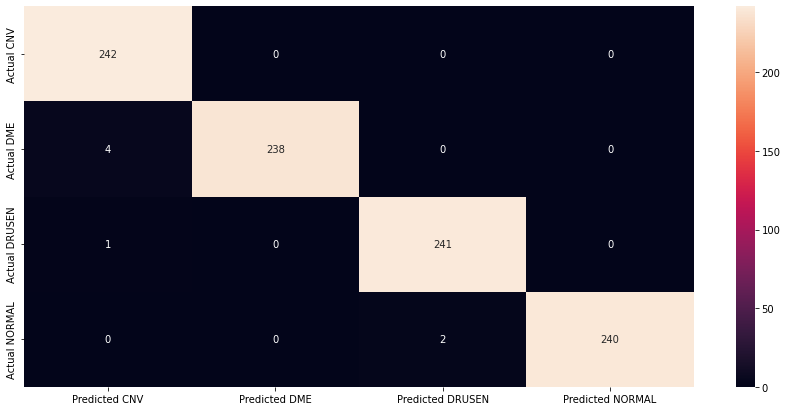

In [43]:
predict_x=model.predict(testRgb) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
y_true = testRgb.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3]),
                  
                  index=["Actual " + idx2label_dict[0],
                         "Actual " + idx2label_dict[1],
                         "Actual " + idx2label_dict[2],
                         "Actual " + idx2label_dict[3]],
                  
                  columns=["Predicted "+ idx2label_dict[0],
                           "Predicted "+ idx2label_dict[1],
                           "Predicted "+ idx2label_dict[2],
                           "Predicted "+ idx2label_dict[3]])

seaborn.heatmap(cm,annot=True,fmt="d");

#test_accuracy = model_MobileNet.evaluate(testRgb)
#print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

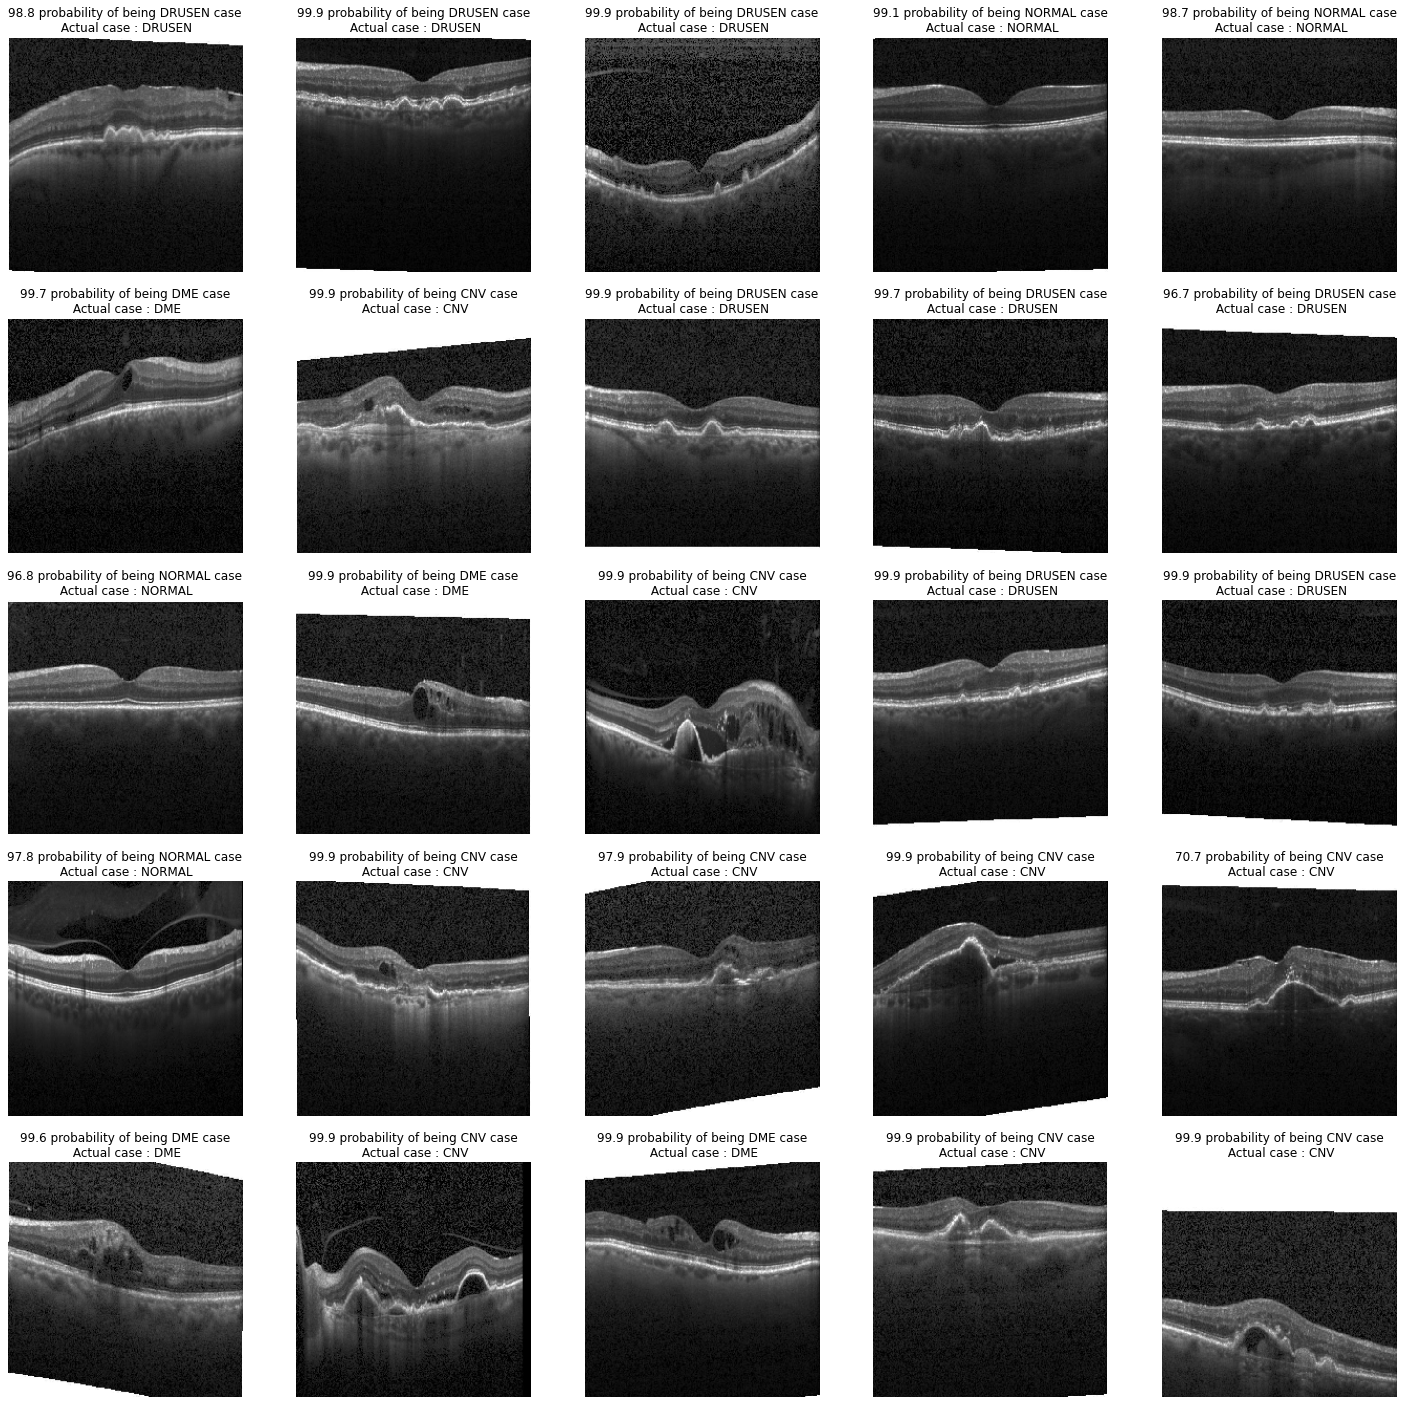

In [45]:
plt.figure(figsize=(25,25))
randomlist = random.sample(range(0, 968), 25)
index_list = 0
for i in range(0+228, 25+228):
        plt.subplot(5, 5, (i-228)+1)
        #print(predict_x[randomlist[index_list]])
        index = np.argmax(predict_x[randomlist[index_list]],axis=0)
        out = str(predict_x[randomlist[index_list]][index]*100)[:4] + ' probability of being '+idx2label_dict[y_pred[randomlist[index_list]]]+' case'
        #print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(testRgb[randomlist[index_list]][0]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [47]:
img = cv2.imread('../input/testdata/DME.jpg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)

[1] [[1.15304566e-07 9.99983907e-01 1.37614906e-08 1.60230557e-05]]
[1] [1.15304565e-05 9.99983902e+01 1.37614904e-06 1.60230557e-03]
[1] 99.99839067459106


<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [48]:
from tensorflow import keras
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("./complexModel.tflite","wb").write(tflite_model)

2022-07-05 21:15:54.986182: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-07-05 21:15:58.601485: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-07-05 21:15:58.601729: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-07-05 21:15:58.612233: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.017ms.
  function_optimizer: function_optimizer did nothing. time = 0.002ms.

2022-07-05 21:15:58.865523: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2022-07-05 21:15:58.865602: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:

7895200

In [49]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./complexModel.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>
